# Ï£ºÏ†ú: 7Ïùº Î∞∞ÏÜ°Ïóê ÎåÄÌïú ÏÜåÎπÑÏûêÏùò Í∞êÏÑ± Î∂ÑÏÑù

In [ ]:
!pip uninstall -y transformers tokenizers sentence-transformers numpy

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
Found existing installation: tokenizers 0.19.1
Uninstalling tokenizers-0.19.1:
  Successfully uninstalled tokenizers-0.19.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [1]:
!pip install numpy==1.26.4
!pip install peft==0.10.0
!pip install transformers==4.41.2

  Using cached peft-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux

In [1]:
from transformers import Trainer  # ÏÑ§Ïπò ÏôÑÎ£å ÌÖåÏä§Ìä∏

## ÏàòÏßë Îç∞Ïù¥ÌÑ∞ import
- news.csv
- comments.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
comments = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments.csv', usecols=['content', 'recommends', 'date', 'news_title'])
news = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news.csv', usecols=['title',	'content', 'press', 'date', 'comments'])

comments.head()

content  recommends  \
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

                  date                           news_title  
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ  
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ  
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ  
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ  
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞

In [ ]:
news.head()

title  \
0      Ïø†Ìå°, Î∂ÑÍ∏∞ 11.4Ï°∞ Îß§Ï∂ú Ïã†Í∏∞Î°ù..ÎåÄÎßåÎèÑ 'Î°úÏºìÎ∞∞ÏÜ°' Îã¨Î¶∞Îã§   
1      ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2       Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   
3  ÏÇ¨ÏÉÅ Ï≤´ 3Ï°∞ Îß§Ï∂ú Í∏àÏûêÌÉë‚Ä¶‚ÄòÌú¥Ïùº Î∞∞ÏÜ°‚Äô ÏäπÎ∂ÄÏàò [CEO LOUNGE]   
4        ÌïúÏßÑÎèÑ CJÎåÄÌïúÌÜµÏö¥ Ïù¥Ïñ¥ 'Ï£º7Ïùº' Î∞∞ÏÜ°‚Ä¶27ÏùºÎ∂ÄÌÑ∞ ÏãúÎ≤îÏãúÌñâ   

                                             content   press  \
0  (Ï¢ÖÌï©)6Í∞ú Î∂ÑÍ∏∞ Ïó∞ÏÜç Ï†ÑÎÖÑÊØî 20%ÎåÄ ÏÑ±Ïû•..ÍπÄÎ≤îÏÑù "ÏàòÎÖÑÍ∞Ñ Ï†ÑÎûµÏ†Å Ìà¨Ïûê Í≤∞Ïã§"ÏÉÅ...   Î®∏ÎãàÌà¨Îç∞Ïù¥   
1  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...    Ïó∞Ìï©Îâ¥Ïä§   
2  ÏàòÏàòÎ£å ÎäòÎ©∞ 1Î∂ÑÍ∏∞ ÏòÅÏóÖÏùµ 21.9% Í∞êÏÜåÌïúÏßÑ¬∑Î°ØÎç∞, ÎãπÎ∂ÑÍ∞Ñ ÏÉÅÌô© ÏßÄÏºúÎ≥¥Î©∞ ÎåÄÏùë  ...    Ï°∞ÏÑ†ÎπÑÏ¶à   
3  Ï°∞ÌòÑÎØº ÌïúÏßÑ ÏÇ¨Ïû•\n\n\n\n 1983ÎÖÑÏÉù/ ÎØ∏Íµ≠ ÎÇ®Í∞ÄÏ£ºÎåÄ(USC) Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò ...  Îß§Í≤ΩÏù¥ÏΩîÎÖ∏ÎØ∏   
4  ÌïúÏßÑ, 4ÏõîÎßêÎ∂ÄÌÑ∞ Îß§ÏùºÎ∞∞ÏÜ° Ï†ÑÍ≤©ÏãúÌñâÎ°ØÎç∞Í∏ÄÎ°úÎ≤åÎ°úÏßÄÏä§ Îì± Îã§Î•∏ Î¨ºÎ•òÏóÖÏ≤¥ Îì±ÎèÑ Í≥†ÎØº Ï§ë\...     Îâ¥Ïä§1   

                  date  comments  
0  2025-05-07 11:24:57         5  
1  2025-05-14 11:33:18         6  
2  2025-05-15 10:01:10         9  
3  2025-05-13 21:01:21         4  
4  2025-04-20 06:40:00        14

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨




In [5]:
import re

def clean_text(text):
    if pd.isna(text): return ''
    text = re.sub(r"\n", " ", text)                  # Ï§ÑÎ∞îÍøà Ï†úÍ±∞
    text = re.sub(r"[^\uAC00-\uD7A3a-zA-Z0-9\s]", "", text)  # ÌïúÍ∏Ä, ÏòÅÎ¨∏ Ïô∏ Ï†úÍ±∞
    text = re.sub(r"\s+", " ", text).strip()         # Ïó¨Îü¨ Í≥µÎ∞± Ï†úÍ±∞
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[a-zA-Z]{10,}', '', text)
    return text

In [6]:
!pip install konlpy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 109.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 44.9 MB/s eta 0:00:00


In [15]:
from konlpy.tag import Okt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Î°úÎìú
okt = Okt()

# Î™®Îç∏ ÌïôÏäµÏö© Í∏∞Î≥∏ Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
model_stopwords = [
    'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§', 'Îäî', 'Ï¢Ä', 'Ïûò', 'Í≥º', 'ÎèÑ', 'Î•º',
    'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§', 'ÎêòÎã§', 'ÏûàÎã§', 'ÏóÜÎã§', 'Ïù¥Îã§', 'Í∞ôÎã§'
]

# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏö© Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ (Î™®Îç∏ Î∂àÏö©Ïñ¥ + Ï£ºÏ†ú Í¥ÄÎ†® Îã®Ïñ¥ ÌôïÏû•)
wordcloud_stopwords = model_stopwords + [
    'ÎßêÌïòÎã§', 'ÏÉùÍ∞ÅÌïòÎã§', 'Í∑∏Î†áÎã§', 'Ïù¥Î†áÎã§', 'ÎïåÎ¨∏', 'Ï†ïÎèÑ', 'ÏûêÏã†',
    'ÌÉùÎ∞∞', 'Î∞∞ÏÜ°', 'Í∏∞ÏÇ¨', '7Ïùº', 'ÏùºÏöîÏùº', 'Í≥†Í∞ù', 'Ïö∞Î¶¨',
    'Îçî', 'Îã§Ïãú', 'Ïù¥Îü∞', 'Ï†ÄÎü∞', 'Í∑∏Îü∞', 'Í±∏', 'Í±¥', 'Ïàò', 'Í≤É'
]

wc_stopwords = set(model_stopwords + wordcloud_stopwords)
stopwords = set(model_stopwords)

# ÌÜ†ÌÅ∞Ìôî + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò -> ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏö©
def tokenize_and_filter_wordlcoud(text):
    if not isinstance(text, str):
        return []  # Í≤∞Ï∏°Í∞í ÏòàÏô∏ Ï≤òÎ¶¨
    tokens = okt.morphs(text, stem=True)
    clean_tokens = [word for word in tokens if word not in wc_stopwords and len(word) > 1]
    return clean_tokens

# ÌÜ†ÌÅ∞Ìôî + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò -> Í∏∞Î≥∏ Î™®Îç∏Ïö©
def tokenize_and_filter(text):
    if not isinstance(text, str):
        return []  # Í≤∞Ï∏°Í∞í ÏòàÏô∏ Ï≤òÎ¶¨
    tokens = okt.morphs(text, stem=True)
    clean_tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return clean_tokens

In [8]:
comments['clean_content'] = comments['content'].apply(clean_text)
news['clean_content'] = news['content'].apply(clean_text)

comments['clean_content'].head()

0             ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØÏ£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®
1                                   Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§
2    ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...
3      Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§
4                                             ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§
Name: clean_content, dtype: object

In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï

from pykospacing import Spacing

spacing = Spacing()

print("ÍµêÏ†ï Ï†Ñ: " + comments['clean_content'][0])
print("ÍµêÏ†ï ÌõÑ: " + spacing(comments['clean_content'][0]))

ÍµêÏ†ï Ï†Ñ: ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØÏ£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®
ÍµêÏ†ï ÌõÑ: ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®


In [13]:
comments['clean_content'] = comments['clean_content'].apply(spacing)

In [17]:
comments['wordcloud_tokens'] = comments['clean_content'].apply(tokenize_and_filter_wordlcoud)
comments['model_tokens'] = comments['clean_content'].apply(tokenize_and_filter)

comments['model_tokens'].head()

0     [ÎåìÍ∏ÄÎã¨Îã§, ÏÇ¨Îûå, ÌïúÏßÑ, ÏßÅÏõê, 7Ïùº, ÎÑòÎã§, ÌÉùÎ∞∞, Í∏∞ÏÇ¨, Îì§Îã§, Ï∂©Î∂ÑÌïòÎã§, Ïù¥Ìï¥]
1                                        [Ïó¨Í∏∞, ÎåìÍ∏Ä, Í≥µÎ¨¥Ïõê]
2    [ÌäπÍ≥†, ÏõîÍ∏âÏüÅÏù¥, ÌûòÎì§Îã§, ÌïòÎãà, Í≥†Ïö©, ÏÇ∞Ïû¨, ÎùºÎèÑ, ÌòúÌÉù, Î≥¥Îùº, Í∑∏ÎåÄÎ°ú, Ìäπ...
3        [Ïø†Ìå°, ÌÉùÎ∞∞, ÏãúÏä§ÌÖú, Í∞úÌåê, ÎßåÎì§Îã§, Í≥†Í∞ù, Ìé∏ÌïòÎã§, ÎÖ∏ÎèôÏûê, Î™©Ïà®, Î∞îÍæ∏Îã§]
4                                            [ÌèêÏßÄ, ÌûòÎì§Îã§]
Name: model_tokens, dtype: object

In [21]:
comments.head()

content  recommends  \
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

                  date                           news_title  \
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                                       clean_content  \
0     ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®   
1                               Ïó¨Í∏∞ ÎåìÍ∏Ä Îã® Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥ Ïã†Í∞ëÎÑ§   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ Îßê Í∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ ...   
3  Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥ Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæº...   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§   

                                    wordcloud_tokens  \
0               [ÎåìÍ∏ÄÎã¨Îã§, ÏÇ¨Îûå, ÌïúÏßÑ, ÏßÅÏõê, ÎÑòÎã§, Îì§Îã§, Ï∂©Î∂ÑÌïòÎã§, Ïù¥Ìï¥]   
1                                      [Ïó¨Í∏∞, ÎåìÍ∏Ä, Í≥µÎ¨¥Ïõê]   
2  [ÌäπÍ≥†, ÏõîÍ∏âÏüÅÏù¥, ÌûòÎì§Îã§, ÌïòÎãà, Í≥†Ïö©, ÏÇ∞Ïû¨, ÎùºÎèÑ, ÌòúÌÉù, Î≥¥Îùº, Í∑∏ÎåÄÎ°ú, Ìäπ...   
3              [Ïø†Ìå°, ÏãúÏä§ÌÖú, Í∞úÌåê, ÎßåÎì§Îã§, Ìé∏ÌïòÎã§, ÎÖ∏ÎèôÏûê, Î™©Ïà®, Î∞îÍæ∏Îã§]   
4                                          [ÌèêÏßÄ, ÌûòÎì§Îã§]   

                                        model_tokens  
0   [ÎåìÍ∏ÄÎã¨Îã§, ÏÇ¨Îûå, ÌïúÏßÑ, ÏßÅÏõê, 7Ïùº, ÎÑòÎã§, ÌÉùÎ∞∞, Í∏∞ÏÇ¨, Îì§Îã§, Ï∂©Î∂ÑÌïòÎã§, Ïù¥Ìï¥]  
1                                      [Ïó¨Í∏∞, ÎåìÍ∏Ä, Í≥µÎ¨¥Ïõê]  
2  [ÌäπÍ≥†, ÏõîÍ∏âÏüÅÏù¥, ÌûòÎì§Îã§, ÌïòÎãà, Í≥†Ïö©, ÏÇ∞Ïû¨, ÎùºÎèÑ, ÌòúÌÉù, Î≥¥Îùº, Í∑∏ÎåÄÎ°ú, Ìäπ...  
3      [Ïø†Ìå°, ÌÉùÎ∞∞, ÏãúÏä§ÌÖú, Í∞úÌåê, ÎßåÎì§Îã§, Í≥†Í∞ù, Ìé∏ÌïòÎã§, ÎÖ∏ÎèôÏûê, Î™©Ïà®, Î∞îÍæ∏Îã§]  
4                                          [ÌèêÏßÄ, ÌûòÎì§Îã§]

In [22]:
comments.to_csv('comments_tokenize.csv')
news.to_csv('news_tokenize.csv')

## Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ Ïû¨ import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/2025_textmining/proj

In [45]:
import pandas as pd

comments_tokenize = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize.csv').dropna(subset=["Unnamed: 0"]).reset_index(drop=True)
news_tokenize = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize.csv').dropna(subset=["Unnamed: 0"]).reset_index(drop=True)

In [42]:
comments_tokenize.head()

Unnamed: 0                                            content  recommends  \
0           0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1           1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2           2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3           3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4           4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

                  date                           news_title  \
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                                       clean_content  \
0     ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®   
1                               Ïó¨Í∏∞ ÎåìÍ∏Ä Îã® Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥ Ïã†Í∞ëÎÑ§   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ Îßê Í∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ ...   
3  Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥ Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæº...   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§   

                                    wordcloud_tokens  \
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', 'ÎÑòÎã§', 'Îì§Îã§', 'Ï∂©Î∂ÑÌïòÎã§',...   
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']   
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...   
3  ['Ïø†Ìå°', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Ìé∏ÌïòÎã§', 'ÎÖ∏ÎèôÏûê', 'Î™©Ïà®',...   
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']   

                                        model_tokens  
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', '7Ïùº', 'ÎÑòÎã§', 'ÌÉùÎ∞∞', '...  
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']  
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...  
3  ['Ïø†Ìå°', 'ÌÉùÎ∞∞', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Í≥†Í∞ù', 'Ìé∏ÌïòÎã§', ...  
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']

In [46]:
comments_tokenize_label = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_label.csv', usecols=['content', 'label'])
news_tokenize_label = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_label.csv', usecols=['content', 'label'])

In [38]:
comments_tokenize_label.head()

label                                            content
0      0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®
1      1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé
2      0  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...
3      0    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§
4      0                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§

In [43]:
# content Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (left join: comments_tokenize Í∏∞Ï§Ä)
merged_df = pd.merge(comments_tokenize, comments_tokenize_label[['content', 'label']], on='content', how='left')

# Í≤∞Í≥º ÌôïÏù∏
print(merged_df.columns)
print(merged_df[['content', 'label']].head())

Index(['Unnamed: 0', 'content', 'recommends', 'date', 'news_title',
       'clean_content', 'wordcloud_tokens', 'model_tokens', 'label'],
      dtype='object')
                                             content  label
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®    0.0
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé    1.0
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...    0.0
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§    0.0
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§    0.0


In [47]:
# content Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (left join: news__tokenize Í∏∞Ï§Ä)
merged_news_df = pd.merge(news_tokenize, news_tokenize_label[['content', 'label']], on='content', how='left')

# Í≤∞Í≥º ÌôïÏù∏
print(merged_news_df.columns)
print(merged_news_df[['content', 'label']].head())

Index(['Unnamed: 0', 'title', 'content', 'press', 'date', 'comments',
       'clean_content', 'label'],
      dtype='object')
                                             content label
0  (Ï¢ÖÌï©)6Í∞ú Î∂ÑÍ∏∞ Ïó∞ÏÜç Ï†ÑÎÖÑÊØî 20%ÎåÄ ÏÑ±Ïû•..ÍπÄÎ≤îÏÑù "ÏàòÎÖÑÍ∞Ñ Ï†ÑÎûµÏ†Å Ìà¨Ïûê Í≤∞Ïã§"ÏÉÅ...     1
1  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...     0
2  ÏàòÏàòÎ£å ÎäòÎ©∞ 1Î∂ÑÍ∏∞ ÏòÅÏóÖÏùµ 21.9% Í∞êÏÜåÌïúÏßÑ¬∑Î°ØÎç∞, ÎãπÎ∂ÑÍ∞Ñ ÏÉÅÌô© ÏßÄÏºúÎ≥¥Î©∞ ÎåÄÏùë  ...     0
3  Ï°∞ÌòÑÎØº ÌïúÏßÑ ÏÇ¨Ïû•\n\n\n\n 1983ÎÖÑÏÉù/ ÎØ∏Íµ≠ ÎÇ®Í∞ÄÏ£ºÎåÄ(USC) Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò ...     1
4  ÌïúÏßÑ, 4ÏõîÎßêÎ∂ÄÌÑ∞ Îß§ÏùºÎ∞∞ÏÜ° Ï†ÑÍ≤©ÏãúÌñâÎ°ØÎç∞Í∏ÄÎ°úÎ≤åÎ°úÏßÄÏä§ Îì± Îã§Î•∏ Î¨ºÎ•òÏóÖÏ≤¥ Îì±ÎèÑ Í≥†ÎØº Ï§ë\...     1


In [44]:
# labelÏù¥ ÏóÜÎäî Ìñâ Ï†úÍ±∞
merged_df = merged_df.dropna(subset=['label'])

# labelÏù¥ floatÏúºÎ°ú Î∂ôÏùÑ ÏàòÎèÑ ÏûàÏúºÎãà Ï†ïÏàòÎ°ú ÌòïÎ≥ÄÌôò
merged_df['label'] = merged_df['label'].astype(int)

<ipython-input-44-3147582528>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['label'] = merged_df['label'].astype(int)


In [46]:
# Í≤∞Í≥º Ï†ÄÏû•
comments_tokenize = merged_df

In [53]:
comments_tokenize.to_csv('comments_tokenize_label.csv')

In [48]:
merged_news_df.to_csv('news_tokenize_label.csv')

## Í∏çÎ∂ÄÏ†ï ÎùºÎ≤®ÎßÅ - koBERT Ïù¥Ïö©

#### comments

In [24]:
import pandas as pd

comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

In [25]:
import pandas as pd

# ÎùºÎ≤®Î≥ÑÎ°ú Î∂ÑÎ¶¨
positive_df = comments_df[comments_df['label'] == 1]
negative_df = comments_df[comments_df['label'] == 0]

# Í∞úÏàò ÌôïÏù∏
print("Í∏çÏ†ï Í∞úÏàò:", len(positive_df))
print("Î∂ÄÏ†ï Í∞úÏàò:", len(negative_df))

# Î™á Î∞∞ Î≥µÏ†úÌï†ÏßÄ Í≥ÑÏÇ∞
rep_factor = len(negative_df) // len(positive_df)
print(f"Í∏çÏ†ï ÏÉòÌîåÏùÑ {rep_factor}Î∞∞ Î≥µÏ†ú")

# Î≥µÏ†ú Î∞è Ìï©ÏπòÍ∏∞
positive_upsampled = pd.concat([positive_df] * rep_factor, ignore_index=True)
balanced_df = pd.concat([negative_df, positive_upsampled], ignore_index=True)

# ÏÑûÍ∏∞
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Í≤∞Í≥º ÌôïÏù∏
print("Î≥µÏ†ú ÌõÑ Í∏çÏ†ï Í∞úÏàò:", sum(balanced_df['label'] == 1))
print("Î≥µÏ†ú ÌõÑ Î∂ÄÏ†ï Í∞úÏàò:", sum(balanced_df['label'] == 0))

Í∏çÏ†ï Í∞úÏàò: 86
Î∂ÄÏ†ï Í∞úÏàò: 510
Í∏çÏ†ï ÏÉòÌîåÏùÑ 5Î∞∞ Î≥µÏ†ú
Î≥µÏ†ú ÌõÑ Í∏çÏ†ï Í∞úÏàò: 430
Î≥µÏ†ú ÌõÑ Î∂ÄÏ†ï Í∞úÏàò: 510


In [26]:
# koBERT tokenizerÎ°ú ÏûÖÎ†• Ìè¨Îß∑ÏùÄ Î¨∏Ïû• ÌòïÌÉú
sentences = balanced_df['clean_content'].tolist()

# huggingface tokenizer ÏÇ¨Ïö©
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")

# koBERT ÏûÖÎ†• Ìè¨Îß∑ Î≥ÄÌôò
inputs = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"
)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [28]:
# news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
# comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

comments_sentences = balanced_df['clean_content'].tolist()
comments_labels = [int(label) for label in balanced_df['label']]

# news_sentences = news_df['clean_content'].tolist()
# news_labels = [0 if str(label).strip() == '-' else int(label) for label in news_df['label']]

In [29]:
from sklearn.model_selection import train_test_split

# news_train_texts, news_val_texts, news_train_labels, news_val_labels = train_test_split(
#     news_sentences, news_labels, test_size=0.2, stratify=news_labels, random_state=42
# )

comments_train_texts, comments_val_texts, comments_train_labels, comments_val_labels = train_test_split(
    comments_sentences, comments_labels, test_size=0.2, stratify=comments_labels, random_state=42
)

In [30]:
from datasets import Dataset
from transformers import AutoTokenizer

# HuggingFace DatasetÏúºÎ°ú Î≥ÄÌôò
comments_train_dataset = Dataset.from_dict({
    'text': comments_train_texts,
    'label': comments_train_labels
})
comments_val_dataset = Dataset.from_dict({
    'text': comments_val_texts,
    'label': comments_val_labels
})

# KcELECTRA tokenizer
tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")

# tokenize Ìï®Ïàò Ï†ïÏùò
def tokenize(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=64)

# ÌÜ†ÌÅ∞Ìôî Ï†ÅÏö©
comments_train_dataset = comments_train_dataset.map(tokenize, batched=True)
comments_val_dataset = comments_val_dataset.map(tokenize, batched=True)

# text Ïó¥ Ï†úÍ±∞ÌïòÍ≥† torch ÌÖêÏÑúÎ°ú Î≥ÄÌôò
comments_train_dataset = comments_train_dataset.remove_columns("text")
comments_val_dataset = comments_val_dataset.remove_columns("text")
comments_train_dataset.set_format("torch")
comments_val_dataset.set_format("torch")

Map:   0%|          | 0/752 [00:00<?, ? examples/s]

Map:   0%|          | 0/188 [00:00<?, ? examples/s]

In [31]:
import torch

# GPU ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎ©¥ GPU, ÏïÑÎãàÎ©¥ CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: {device}")

ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: cuda


In [32]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# KcELECTRA Î™®Îç∏ Î°úÎìú (2Í∞ú ÌÅ¥ÎûòÏä§: Í∏çÏ†ï/Î∂ÄÏ†ï)
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base", num_labels=2)
model.to(device)

# ÌõàÎ†® ÏÑ§Ï†ï
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    # evaluation_strategy="epoch",
    # save_strategy="epoch",
    logging_dir="./logs",
    report_to="none",
)

# Trainer ÏÑ§Ï†ï
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=comments_train_dataset,
    eval_dataset=comments_val_dataset,
)

# ÌïôÏäµ ÏãúÏûë
trainer.train()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=1410, training_loss=0.03529593686685494, metrics={'train_runtime': 284.9635, 'train_samples_per_second': 79.168, 'train_steps_per_second': 4.948, 'total_flos': 741973176115200.0, 'train_loss': 0.03529593686685494, 'epoch': 30.0})

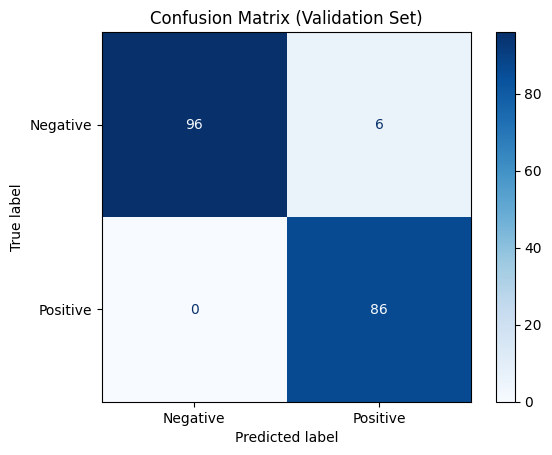

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ïã§Ï†ú Î†àÏù¥Î∏î (Ïòà: comments_val_labels ÎòêÎäî comments_train_labels Ï§ë ÌïòÎÇò)
true_labels = comments_val_labels  # ÎòêÎäî comments_train_labels

# ÏòàÏ∏° Î†àÏù¥Î∏î (Trainer ÏòàÏ∏° Í≤∞Í≥ºÏóêÏÑú Í∞ÄÏ†∏Ïò§Í∏∞)
from transformers import Trainer
outputs = trainer.predict(comments_val_dataset)
predictions = outputs.predictions.argmax(axis=1)

# Confusion Matrix Í≥ÑÏÇ∞
cm = confusion_matrix(true_labels, predictions)

# ÏãúÍ∞ÅÌôî
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.show()

In [34]:
from sklearn.metrics import classification_report, accuracy_score

# ÏòàÏ∏°Í∞íÏùÄ Ïù¥ÎØ∏ ÏûàÏúºÎØÄÎ°ú true_labelsÏôÄ predictions Ïù¥Ïö©
print("‚úÖ Accuracy:", accuracy_score(true_labels, predictions))

# ÌÅ¥ÎûòÏä§Î≥Ñ precision, recall, f1-score Ï∂úÎ†•
print("\nüìä Classification Report:")
print(classification_report(true_labels, predictions, target_names=["Negative", "Positive"]))

‚úÖ Accuracy: 0.9680851063829787

üìä Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.94      0.97       102
    Positive       0.93      1.00      0.97        86

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [39]:
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/tokenizer.json')

In [20]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # Ï†ÄÏû•Îêú Í≤ΩÎ°úÏóêÏÑú Î°úÎìú
# model_path = "/content/drive/MyDrive/2025_textmining/proj/sentiment_model"

# tokenizer = AutoTokenizer.from_pretrained(model_path)
# model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [6]:
model.to('cuda')

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [35]:
# ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_sentiments(texts):
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="pt"
    )
    inputs = {k: v.to("cuda") for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
    return predictions.cpu().tolist()

# ÏòàÏãú: comments_tokenizeÏùò clean_content Ïª¨ÎüºÏóê ÎåÄÌï¥ ÏòàÏ∏°
comments = comments_tokenize['clean_content'].tolist()
predicted_labels = predict_sentiments(comments)

# Í≤∞Í≥º Î∂ôÏù¥Í∏∞
comments_tokenize['predicted_label'] = predicted_labels

#### news

In [49]:
import pandas as pd

news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
news_texts = news_df['clean_content'].tolist()

In [57]:
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')

# '-'Î•º 0ÏúºÎ°ú ÎåÄÏ≤¥, NaNÎèÑ 0ÏúºÎ°ú Ï±ÑÏö¥ ÌõÑ int Î≥ÄÌôò
news_df['label'] = news_df['label'].replace('-', 0)
news_df['label'] = news_df['label'].fillna(0).astype(int)

In [58]:
from transformers import TextClassificationPipeline, AutoTokenizer, AutoModelForSequenceClassification

# Î™®Îç∏ & ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")

# ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Í∏∏Ïù¥ ÏûêÎ•¥Í∏∞ Ìï®Ïàò
def truncate_text(text, max_len=512):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    input_ids = input_ids[:max_len]
    return tokenizer.decode(input_ids, skip_special_tokens=True)

# Îâ¥Ïä§ ÌÖçÏä§Ìä∏ Î∂àÎü¨Ïò§Í∏∞
news_texts = news_df["clean_content"].astype(str).tolist()
truncated_news = [truncate_text(text) for text in news_texts]

# üî• Ï†ÑÏ≤¥ ÏòàÏ∏° ÏàòÌñâ
predictions = pipe(truncated_news, truncation=True)

# üîÅ Í≤∞Í≥º Ï†ïÏ†ú
predicted_labels = []
for pred in predictions:
    if isinstance(pred, list):  # ÌòπÏãú Î™®Î•º Ïù¥Ï§ë Î¶¨Ïä§Ìä∏ ÎåÄÏùë
        pred = pred[0]
    predicted_labels.append(pred['label'])

# üîÅ ÎùºÎ≤® Ï†ïÏàò Î≥ÄÌôò
label_map = {'LABEL_0': 0, 'LABEL_1': 1}
news_df['predicted_label'] = [label_map.get(label, -1) for label in predicted_labels]

Token indices sequence length is longer than the specified maximum sequence length for this model (1079 > 512). Running this sequence through the model will result in indexing errors


‚úÖ Accuracy: 0.3497

üìä Classification Report:
              precision    recall  f1-score   support

    Negative       0.35      1.00      0.52        64
    Positive       0.00      0.00      0.00       119

    accuracy                           0.35       183
   macro avg       0.17      0.50      0.26       183
weighted avg       0.12      0.35      0.18       183



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


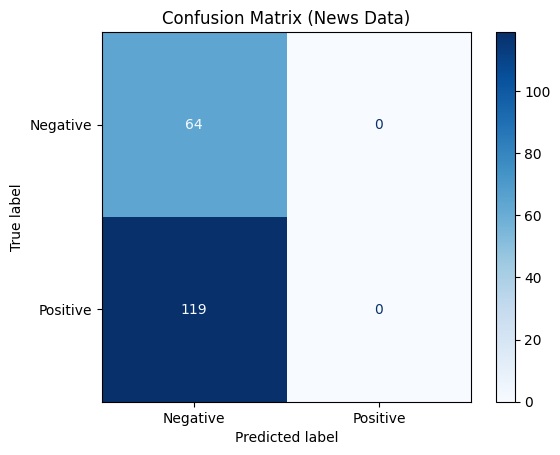

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤®
true_labels = news_df["label"].astype(int)
pred_labels = news_df["predicted_label"].astype(int)

# Ï†ïÌôïÎèÑ
acc = accuracy_score(true_labels, pred_labels)
print(f"‚úÖ Accuracy: {acc:.4f}\n")

# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
print("üìä Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (News Data)")
plt.grid(False)
plt.show()

In [72]:
news_df = news_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [75]:
comments_df = comments_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [76]:
news_df.head()

title  \
0      Ïø†Ìå°, Î∂ÑÍ∏∞ 11.4Ï°∞ Îß§Ï∂ú Ïã†Í∏∞Î°ù..ÎåÄÎßåÎèÑ 'Î°úÏºìÎ∞∞ÏÜ°' Îã¨Î¶∞Îã§   
1      ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2       Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   
3  ÏÇ¨ÏÉÅ Ï≤´ 3Ï°∞ Îß§Ï∂ú Í∏àÏûêÌÉë‚Ä¶‚ÄòÌú¥Ïùº Î∞∞ÏÜ°‚Äô ÏäπÎ∂ÄÏàò [CEO LOUNGE]   
4        ÌïúÏßÑÎèÑ CJÎåÄÌïúÌÜµÏö¥ Ïù¥Ïñ¥ 'Ï£º7Ïùº' Î∞∞ÏÜ°‚Ä¶27ÏùºÎ∂ÄÌÑ∞ ÏãúÎ≤îÏãúÌñâ   

                                             content   press  \
0  (Ï¢ÖÌï©)6Í∞ú Î∂ÑÍ∏∞ Ïó∞ÏÜç Ï†ÑÎÖÑÊØî 20%ÎåÄ ÏÑ±Ïû•..ÍπÄÎ≤îÏÑù "ÏàòÎÖÑÍ∞Ñ Ï†ÑÎûµÏ†Å Ìà¨Ïûê Í≤∞Ïã§"ÏÉÅ...   Î®∏ÎãàÌà¨Îç∞Ïù¥   
1  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...    Ïó∞Ìï©Îâ¥Ïä§   
2  ÏàòÏàòÎ£å ÎäòÎ©∞ 1Î∂ÑÍ∏∞ ÏòÅÏóÖÏùµ 21.9% Í∞êÏÜåÌïúÏßÑ¬∑Î°ØÎç∞, ÎãπÎ∂ÑÍ∞Ñ ÏÉÅÌô© ÏßÄÏºúÎ≥¥Î©∞ ÎåÄÏùë  ...    Ï°∞ÏÑ†ÎπÑÏ¶à   
3  Ï°∞ÌòÑÎØº ÌïúÏßÑ ÏÇ¨Ïû•\n\n\n\n 1983ÎÖÑÏÉù/ ÎØ∏Íµ≠ ÎÇ®Í∞ÄÏ£ºÎåÄ(USC) Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò ...  Îß§Í≤ΩÏù¥ÏΩîÎÖ∏ÎØ∏   
4  ÌïúÏßÑ, 4ÏõîÎßêÎ∂ÄÌÑ∞ Îß§ÏùºÎ∞∞ÏÜ° Ï†ÑÍ≤©ÏãúÌñâÎ°ØÎç∞Í∏ÄÎ°úÎ≤åÎ°úÏßÄÏä§ Îì± Îã§Î•∏ Î¨ºÎ•òÏóÖÏ≤¥ Îì±ÎèÑ Í≥†ÎØº Ï§ë\...     Îâ¥Ïä§1   

                  date  comments  \
0  2025-05-07 11:24:57         5   
1  2025-05-14 11:33:18         6   
2  2025-05-15 10:01:10         9   
3  2025-05-13 21:01:21         4   
4  2025-04-20 06:40:00        14   

                                       clean_content  label  predicted_label  
0  Ï¢ÖÌï©6Í∞ú Î∂ÑÍ∏∞ Ïó∞ÏÜç Ï†ÑÎÖÑ 20ÎåÄ ÏÑ±Ïû•ÍπÄÎ≤îÏÑù ÏàòÎÖÑÍ∞Ñ Ï†ÑÎûµÏ†Å Ìà¨Ïûê Í≤∞Ïã§ÏÉÅÏû• Ïù¥ÌõÑ ÏµúÎåÄ ...      1                0  
1  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ ÏÑú...      0                0  
2  ÏàòÏàòÎ£å ÎäòÎ©∞ 1Î∂ÑÍ∏∞ ÏòÅÏóÖÏùµ 219 Í∞êÏÜåÌïúÏßÑÎ°ØÎç∞ ÎãπÎ∂ÑÍ∞Ñ ÏÉÅÌô© ÏßÄÏºúÎ≥¥Î©∞ ÎåÄÏùë Ï£º 7Ïùº ...      0                0  
3  Ï°∞ÌòÑÎØº ÌïúÏßÑ ÏÇ¨Ïû• 1983ÎÖÑÏÉù ÎØ∏Íµ≠ ÎÇ®Í∞ÄÏ£ºÎåÄUSC Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò Ï†ÑÍ≥µ ÏÑúÏö∏ÎåÄ Í≤ΩÏòÅÎåÄÌïô...      1                0  
4  ÌïúÏßÑ 4ÏõîÎßêÎ∂ÄÌÑ∞ Îß§ÏùºÎ∞∞ÏÜ° Ï†ÑÍ≤©ÏãúÌñâÎ°ØÎç∞Í∏ÄÎ°úÎ≤åÎ°úÏßÄÏä§ Îì± Îã§Î•∏ Î¨ºÎ•òÏóÖÏ≤¥ Îì±ÎèÑ Í≥†ÎØº Ï§ë 3...      1                0

In [77]:
comments_df.head()

content  recommends  \
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

                  date                           news_title  \
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                                       clean_content  \
0     ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®   
1                               Ïó¨Í∏∞ ÎåìÍ∏Ä Îã® Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥ Ïã†Í∞ëÎÑ§   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ Îßê Í∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ ...   
3  Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥ Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæº...   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§   

                                    wordcloud_tokens  \
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', 'ÎÑòÎã§', 'Îì§Îã§', 'Ï∂©Î∂ÑÌïòÎã§',...   
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']   
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...   
3  ['Ïø†Ìå°', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Ìé∏ÌïòÎã§', 'ÎÖ∏ÎèôÏûê', 'Î™©Ïà®',...   
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']   

                                        model_tokens  label  
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', '7Ïùº', 'ÎÑòÎã§', 'ÌÉùÎ∞∞', '...      0  
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']      1  
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...      0  
3  ['Ïø†Ìå°', 'ÌÉùÎ∞∞', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Í≥†Í∞ù', 'Ìé∏ÌïòÎã§', ...      0  
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']      0

In [85]:
# title Í∏∞Ï§ÄÏúºÎ°ú Ï°∞Ïù∏ (left join: ÎåìÍ∏Ä Ï§ëÏã¨)
merged_df = pd.merge(
    comments_df, news_df,
    left_on='news_title',
    right_on='title',
    how='inner',  # ÎòêÎäî 'left', 'outer', Î∂ÑÏÑù Î™©Ï†ÅÏóê Îî∞Îùº ÏÑ†ÌÉù.
    suffixes=('_comment', '_news')
)
# Í≤∞Í≥º ÌôïÏù∏
print(merged_df[['label_comment', 'label_news']].head())

   label_comment  label_news
0              0           0
1              1           0
2              0           0
3              0           0
4              0           0


In [86]:
merged_df.head()

content_comment  recommends  \
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

          date_comment                           news_title  \
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                               clean_content_comment  \
0     ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®   
1                               Ïó¨Í∏∞ ÎåìÍ∏Ä Îã® Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥ Ïã†Í∞ëÎÑ§   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ Îßê Í∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ ...   
3  Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥ Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæº...   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§   

                                    wordcloud_tokens  \
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', 'ÎÑòÎã§', 'Îì§Îã§', 'Ï∂©Î∂ÑÌïòÎã§',...   
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']   
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...   
3  ['Ïø†Ìå°', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Ìé∏ÌïòÎã§', 'ÎÖ∏ÎèôÏûê', 'Î™©Ïà®',...   
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']   

                                        model_tokens  label_comment  \
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', '7Ïùº', 'ÎÑòÎã§', 'ÌÉùÎ∞∞', '...              0   
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']              1   
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...              0   
3  ['Ïø†Ìå°', 'ÌÉùÎ∞∞', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Í≥†Í∞ù', 'Ìé∏ÌïòÎã§', ...              0   
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']              0   

                                 title  \
0  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                                        content_news press  \
0  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...  Ïó∞Ìï©Îâ¥Ïä§   
1  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...  Ïó∞Ìï©Îâ¥Ïä§   
2  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...  Ïó∞Ìï©Îâ¥Ïä§   
3  ÌÉùÎ∞∞ÎÖ∏Ï°∞ ÌïúÏßÑÎ≥∏Î∂Ä Ìà¨ÏüÅ ÎèåÏûÖ ÏÑ†Ìè¨ ÌöåÍ≤¨ [ÎØºÏ£ºÎÖ∏Ï¥ù ÏÑúÎπÑÏä§Ïó∞Îßπ Ï†ÑÍµ≠ÌÉùÎ∞∞ÎÖ∏ÎèôÏ°∞Ìï© Ï†úÍ≥µ]...  Ïó∞Ìï©Îâ¥Ïä§   
4  ÏàòÏàòÎ£å ÎäòÎ©∞ 1Î∂ÑÍ∏∞ ÏòÅÏóÖÏùµ 21.9% Í∞êÏÜåÌ

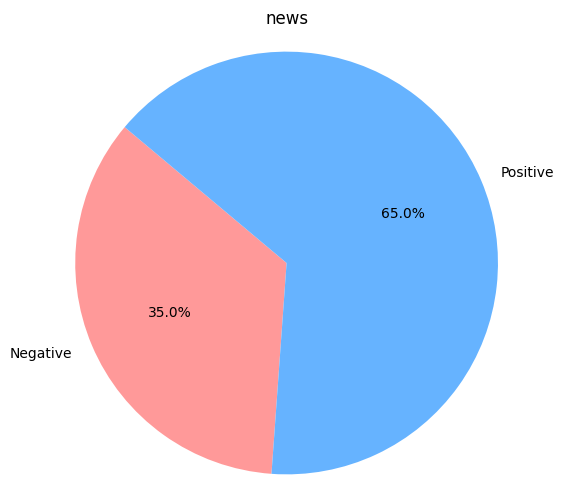

In [96]:
import matplotlib.pyplot as plt

# ÎùºÎ≤®Î≥Ñ Í∞úÏàò Í≥ÑÏÇ∞
label_counts = news_df['label'].value_counts()
labels = ['Negative', 'Positive']
sizes = [label_counts[0], label_counts[1]]
colors = ['#ff9999', '#66b3ff']  # ÏõêÌïòÎäî ÏÉâÏÉÅ ÏÑ§Ï†ï

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('news')
plt.axis('equal')  # ÏõêÌòï Ïú†ÏßÄ
plt.show()

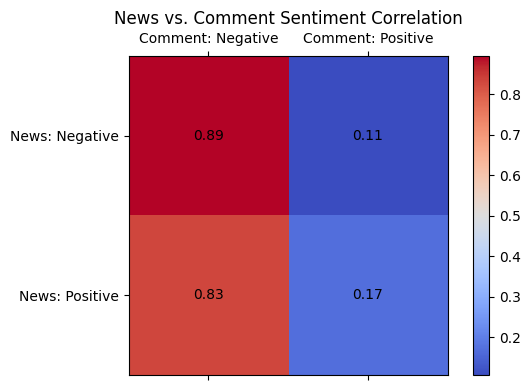

In [93]:
import numpy as np

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab = pd.crosstab(merged_df['label_news'], merged_df['label_comment'])

# ÎπÑÏú®Î°ú Î≥ÄÌôò
row_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(row_percentage.values, cmap='coolwarm')

# Í∞í ÌëúÏãú
for (i, j), val in np.ndenumerate(row_percentage.values):
    ax.text(j, i, f"{val:.2f}", va='center', ha='center', color='black')

# Ï∂ï ÏÑ§Ï†ï
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Comment: Negative', 'Comment: Positive'])
ax.set_yticklabels(['News: Negative', 'News: Positive'])
plt.title("News vs. Comment Sentiment Correlation")
plt.colorbar(cax)
plt.tight_layout()
plt.show()

## ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ Ïû¨ import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:

import pandas as pd

news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

comments_sentences = comments_df['clean_content'].tolist()
comments_labels = [int(label) for label in comments_df['label']]

In [3]:
import pandas as pd

# ÎùºÎ≤®Î≥ÑÎ°ú Î∂ÑÎ¶¨
positive_df = comments_df[comments_df['label'] == 1]
negative_df = comments_df[comments_df['label'] == 0]

# Í∞úÏàò ÌôïÏù∏
print("Í∏çÏ†ï Í∞úÏàò:", len(positive_df))
print("Î∂ÄÏ†ï Í∞úÏàò:", len(negative_df))

# Î™á Î∞∞ Î≥µÏ†úÌï†ÏßÄ Í≥ÑÏÇ∞
rep_factor = len(negative_df) // len(positive_df)
print(f"Í∏çÏ†ï ÏÉòÌîåÏùÑ {rep_factor}Î∞∞ Î≥µÏ†ú")

# Î≥µÏ†ú Î∞è Ìï©ÏπòÍ∏∞
positive_upsampled = pd.concat([positive_df] * rep_factor, ignore_index=True)
balanced_df = pd.concat([negative_df, positive_upsampled], ignore_index=True)

# ÏÑûÍ∏∞
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Í≤∞Í≥º ÌôïÏù∏
print("Î≥µÏ†ú ÌõÑ Í∏çÏ†ï Í∞úÏàò:", sum(balanced_df['label'] == 1))
print("Î≥µÏ†ú ÌõÑ Î∂ÄÏ†ï Í∞úÏàò:", sum(balanced_df['label'] == 0))

Í∏çÏ†ï Í∞úÏàò: 86
Î∂ÄÏ†ï Í∞úÏàò: 510
Í∏çÏ†ï ÏÉòÌîåÏùÑ 5Î∞∞ Î≥µÏ†ú
Î≥µÏ†ú ÌõÑ Í∏çÏ†ï Í∞úÏàò: 430
Î≥µÏ†ú ÌõÑ Î∂ÄÏ†ï Í∞úÏàò: 510


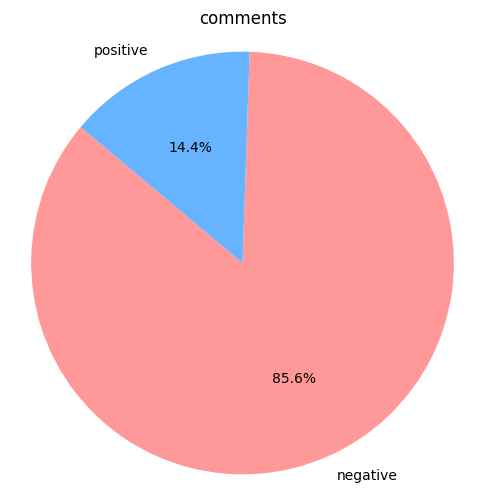

In [97]:
import matplotlib.pyplot as plt

# ÎùºÎ≤®Î≥Ñ Í∞úÏàò Í≥ÑÏÇ∞
label_counts = comments_df['label'].value_counts()
labels = ['negative', 'positive']
sizes = [label_counts[0], label_counts[1]]
colors = ['#ff9999', '#66b3ff']  # ÏõêÌïòÎäî ÏÉâÏÉÅ ÏÑ§Ï†ï

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('comments')
plt.axis('equal')  # ÏõêÌòï Ïú†ÏßÄ
plt.show()

#### ÏãúÍ∞ÅÌôî

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [99]:
!pip install wordcloud

In [116]:
comments_df['wordcloud_tokens'].head()

0    ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', 'ÎÑòÎã§', 'Îì§Îã§', 'Ï∂©Î∂ÑÌïòÎã§',...
1                                  ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']
2    ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...
3    ['Ïø†Ìå°', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Ìé∏ÌïòÎã§', 'ÎÖ∏ÎèôÏûê', 'Î™©Ïà®',...
4                                        ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']
Name: wordcloud_tokens, dtype: object

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ìè∞Ìä∏ Í≤ΩÎ°ú (ÏΩîÎû©Ïù∏ Í≤ΩÏö∞ Ïù¥ Í≤ΩÎ°ú ÏÇ¨Ïö©, Î°úÏª¨ÏùÄ ÏßÅÏ†ë Í≤ΩÎ°ú ÏßÄÏ†ï)
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

In [118]:
import ast

# Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞îÍæ∏Í∏∞
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

In [119]:
# Ï†ÅÏö© ÏòàÏãú
comments_df['wordcloud_tokens'] = comments_df['wordcloud_tokens'].apply(safe_eval)

In [120]:
comments_df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             content  recommends  \
0       ÎåìÍ∏ÄÎã®ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ÎìØ..Ï£º7ÏùºÏùÄ ÏÑ†ÎÑòÏùÄÎìØ ÎÇú. ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà. Ïù¥Ìï¥Ìï®           5   
1                              Ïó¨Í∏∞ ÎåìÍ∏Ä Îã®.Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥Ïã†Í∞ëÎÑ§.„Öé           1   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ ÎßêÍ∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ Ìï¥...           1   
3    Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæºÍ≤ÉÏù¥Îã§           0   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§           3   

                  date                           news_title  \
0  2025-05-15 00:40:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
1  2025-05-14 17:52:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
2  2025-05-14 16:58:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
3  2025-05-20 02:25:00  ÌïúÏßÑÌÉùÎ∞∞ ÎÖ∏Ï°∞, 'Ï£º7Ïùº Î∞∞ÏÜ°' Î∞òÎåÄÌïòÎ©∞ Î∞òÌíàÍ±∞Î∂Ä Îì± ÏüÅÏùò ÎèåÏûÖ   
4  2025-05-17 06:17:00   Ï£º 7Ïùº Î∞∞ÏÜ° CJÎåÄÌïúÌÜµÏö¥ Ïã§Ï†Å Ï£ºÏ∂§‚Ä¶ ÌõÑÎ∞ú ÏóÖÏ≤¥Îäî ÎààÏπò Î≥¥Í∏∞   

                                       clean_content  \
0     ÎåìÍ∏ÄÎã® ÏÇ¨ÎûåÎì§ ÌïúÏßÑ ÏßÅÏõêÏù∏ ÎìØ Ï£º 7ÏùºÏùÄ ÏÑ† ÎÑòÏùÄ ÎìØ ÎÇú ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï∂©Î∂ÑÌûà Ïù¥Ìï¥Ìï®   
1                               Ïó¨Í∏∞ ÎåìÍ∏Ä Îã® Î∂ÑÎì§ÏùÄ Í≥µÎ¨¥ÏõêÏù¥ Ïã†Í∞ëÎÑ§   
2  ÌäπÍ≥†ÏßÅ ÎãàÎì§Ïù¥ ÏõîÍ∏âÏüÅÏù¥ÎÉê ÌûòÎì§Í≤å ÏùºÌïòÎãà Í≥†Ïö© ÏÇ∞Ïû¨ÎùºÎèÑ ÌòúÌÉùÎ≥¥ÎùºÍµ¨ Îßê Í∑∏ÎåÄÎ°ú ÌäπÍ≥†ÏßÅ ...   
3  Ïø†Ìå°Ïù¥ ÌÉùÎ∞∞ ÏãúÏä§ÌÖúÏùÑ Í∞úÌåêÏúºÎ°ú ÎßåÎì§Ïñ¥ÎÜ®Ïñ¥ Í≥†Í∞ùÏù¥ Ìé∏Ìï¥Ï°åÍ≤†ÏßÄÎßå ÎÖ∏ÎèôÏûêÎì§Ïùò Î™©Ïà®Í≥º Î∞îÍæº...   
4                                           ÌèêÏßÄÌï¥Îùº ÌûòÎì§Îã§   

                                    wordcloud_tokens  \
0               [ÎåìÍ∏ÄÎã¨Îã§, ÏÇ¨Îûå, ÌïúÏßÑ, ÏßÅÏõê, ÎÑòÎã§, Îì§Îã§, Ï∂©Î∂ÑÌïòÎã§, Ïù¥Ìï¥]   
1                                      [Ïó¨Í∏∞, ÎåìÍ∏Ä, Í≥µÎ¨¥Ïõê]   
2  [ÌäπÍ≥†, ÏõîÍ∏âÏüÅÏù¥, ÌûòÎì§Îã§, ÌïòÎãà, Í≥†Ïö©, ÏÇ∞Ïû¨, ÎùºÎèÑ, ÌòúÌÉù, Î≥¥Îùº, Í∑∏ÎåÄÎ°ú, Ìäπ...   
3              [Ïø†Ìå°, ÏãúÏä§ÌÖú, Í∞úÌåê, ÎßåÎì§Îã§, Ìé∏ÌïòÎã§, ÎÖ∏ÎèôÏûê, Î™©Ïà®, Î∞îÍæ∏Îã§]   
4                                          [ÌèêÏßÄ, ÌûòÎì§Îã§]   

                                        model_tokens  label  
0  ['ÎåìÍ∏ÄÎã¨Îã§', 'ÏÇ¨Îûå', 'ÌïúÏßÑ', 'ÏßÅÏõê', '7Ïùº', 'ÎÑòÎã§', 'ÌÉùÎ∞∞', '...      0  
1                                ['Ïó¨Í∏∞', 'ÎåìÍ∏Ä', 'Í≥µÎ¨¥Ïõê']      1  
2  ['ÌäπÍ≥†', 'ÏõîÍ∏âÏüÅÏù¥', 'ÌûòÎì§Îã§', 'ÌïòÎãà', 'Í≥†Ïö©', 'ÏÇ∞Ïû¨', 'ÎùºÎèÑ', ...      0  
3  ['Ïø†Ìå°', 'ÌÉùÎ∞∞', 'ÏãúÏä§ÌÖú', 'Í∞úÌåê', 'ÎßåÎì§Îã§', 'Í≥†Í∞ù', 'Ìé∏ÌïòÎã§', ...      0  
4                                      ['ÌèêÏßÄ', 'ÌûòÎì§Îã§']      0

In [125]:
# Í∏çÏ†ï/Î∂ÄÏ†ï ÌÜ†ÌÅ∞ ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
positive_tokens = comments_df[comments_df['label'] == 1]['wordcloud_tokens'].tolist()
negative_tokens = comments_df[comments_df['label'] == 0]['wordcloud_tokens'].tolist()

# Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Ìï©ÏπòÍ∏∞
positive_text = ' '.join([' '.join(tokens) for tokens in positive_tokens])
negative_text = ' '.join([' '.join(tokens) for tokens in negative_tokens])

In [126]:
wordcloud_stopwords = set([
    'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§', 'Îäî', 'Ï¢Ä', 'Ïûò', 'Í≥º', 'ÎèÑ', 'Î•º',
    'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§', 'ÎêòÎã§', 'ÏûàÎã§', 'ÏóÜÎã§', 'Ïù¥Îã§', 'Í∞ôÎã§',
    'ÎßêÌïòÎã§', 'ÏÉùÍ∞ÅÌïòÎã§', 'ÎïåÎ¨∏', 'Ï†ïÎèÑ', 'ÏûêÏã†', 'ÏÇ¨Îûå', 'Ïö∞Î¶¨', 'Îçî', 'Îã§Ïãú',
    'Ïù¥Îü∞', 'Ï†ÄÎü∞', 'Í∑∏Îü∞', 'Í±∏', 'Í±¥', 'Ïàò', 'Í≤É', 'ÏóêÏÑú', 'Î≥¥Îã§', 'ÌïòÍ≥†', 'ÏïäÎã§', 'ÎãàÎã§', 'Ìï¥Ï£ºÎã§', 'Í∞ÄÎã§', 'ÏïÑÎãàÎã§', 'ÍπåÏßÄ'
])

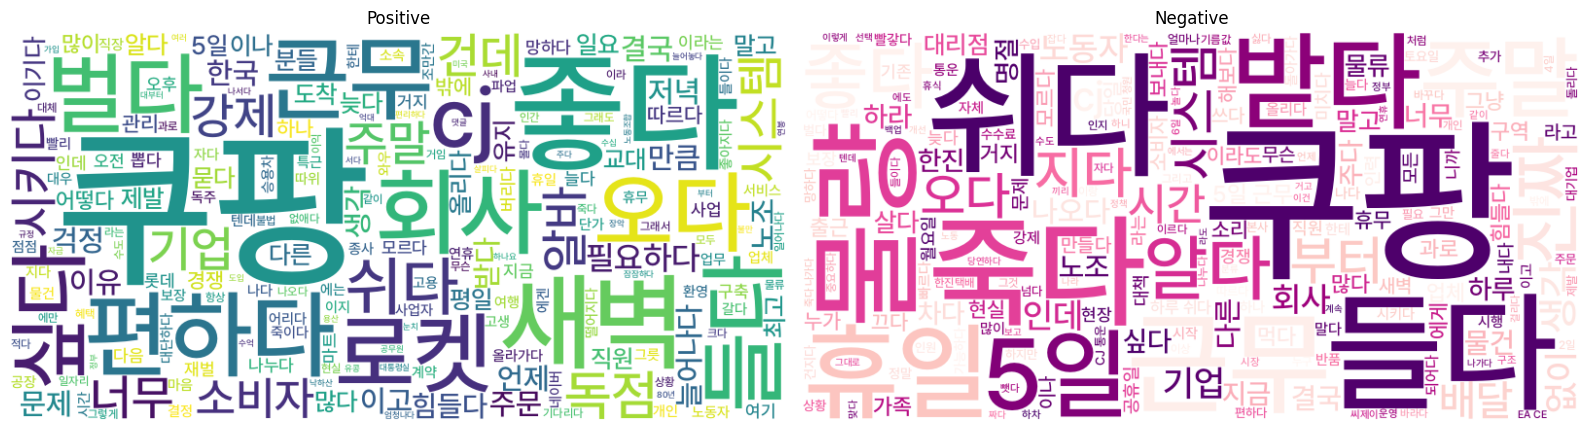

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud Í∞ùÏ≤¥ ÏÉùÏÑ± (Î∂àÏö©Ïñ¥ Ìè¨Ìï®)
wordcloud_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    stopwords=wordcloud_stopwords
).generate(positive_text)

wordcloud_neg = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    colormap='RdPu',
    stopwords=wordcloud_stopwords
).generate(negative_text)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Positive")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import re

def clean_token_list(token_list):
    return [token for token in token_list if re.match(r'^[Í∞Ä-Ìû£a-zA-Z0-9]+$', token)]

# tokens Ïª¨Îüº ÌÅ¥Î¶∞ Ï†ÅÏö©
comments_df['tokens'] = comments_df['tokens'].apply(clean_token_list)

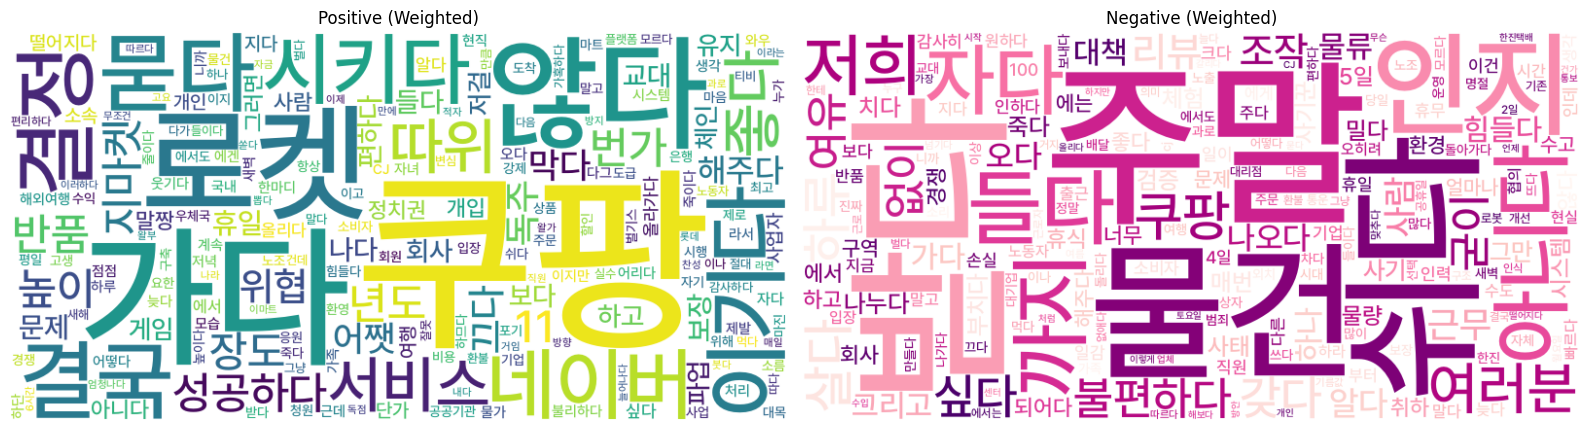

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

# ‚úÖ Ï∂îÏ≤ú Ïàò Í∞ÄÏ§ëÏπòÎ•º Î∞òÏòÅÌïú Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_weighted_freq(tokens_series, recommends_series):
    word_freq = defaultdict(float)
    for tokens, weight in zip(tokens_series, recommends_series):
        # tokensÍ∞Ä Î¨∏ÏûêÏó¥Ïù¥ÎùºÎ©¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        if isinstance(tokens, str):
            tokens = eval(tokens)
        for token in tokens:
            word_freq[token] += float(weight)
    return word_freq

# üîµ Í∏çÏ†ï ÎåìÍ∏Ä Í∞ÄÏ§ëÏπò ÎπàÎèÑ
positive_df = comments_df[comments_df['label'] == 1]
positive_freq = compute_weighted_freq(positive_df['wordcloud_tokens'], positive_df['recommends'])

# üî¥ Î∂ÄÏ†ï ÎåìÍ∏Ä Í∞ÄÏ§ëÏπò ÎπàÎèÑ
negative_df = comments_df[comments_df['label'] == 0]
negative_freq = compute_weighted_freq(negative_df['wordcloud_tokens'], negative_df['recommends'])

# ‚úÖ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    stopwords=wordcloud_stopwords
).generate_from_frequencies(positive_freq)

wordcloud_neg = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    colormap='RdPu',
    stopwords=wordcloud_stopwords
).generate_from_frequencies(negative_freq)

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Positive (Weighted)")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative (Weighted)")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
total = len(comments_df)
negatives = len(comments_df[comments_df['label'] == 0])
negative_ratio = negatives / total * 100

print(f"Ï†ÑÏ≤¥ ÎåìÍ∏Ä Ïàò: {total}Í∞ú")
print(f"Î∂ÄÏ†ï ÎåìÍ∏Ä Ïàò: {negatives}Í∞ú")
print(f"Î∂ÄÏ†ï ÎπÑÏú®: {negative_ratio:.2f}%")

Ï†ÑÏ≤¥ ÎåìÍ∏Ä Ïàò: 596Í∞ú
Î∂ÄÏ†ï ÎåìÍ∏Ä Ïàò: 510Í∞ú
Î∂ÄÏ†ï ÎπÑÏú®: 85.57%


In [172]:
import pandas as pd

# Ï∂îÏ≤ú Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ 3% ÏûÑÍ≥ÑÍ∞í Í≥ÑÏÇ∞
top_3_percent_threshold = comments_df['recommends'].quantile(0.97)

# ÏÉÅÏúÑ 3% ÎåìÍ∏Ä Ï∂îÏ∂ú
top_comments = comments_df[comments_df['recommends'] >= top_3_percent_threshold]

# ÌôïÏù∏
print(f"Ï∂îÏ≤úÏàò ÏÉÅÏúÑ 3% Í∏∞Ï§ÄÍ∞í: {top_3_percent_threshold}")
print(top_comments[['clean_content', 'recommends', 'label']].sort_values(by='recommends', ascending=False).head(10))

Ï∂îÏ≤úÏàò ÏÉÅÏúÑ 3% Í∏∞Ï§ÄÍ∞í: 56.299999999999955
                                         clean_content  recommends  label
396                      Ïó¨Îü¨Î∂ÑÎì§Ïù¥ ÏûàÏñ¥ÏÑú Ï†ÄÌù¨Í∞Ä Î¨ºÍ±¥ÏùÑ Ïûò Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§        1533      0
397             Ï£ºÎßê Î∞∞ÏÜ°ÍπåÏßÄ Íµ≥Ïù¥ Ìï¥Ïïº Ìï†Íπå Ï¢Ä Î∂àÌé∏Ìï¥ÎèÑ Ïó¨Ïú†Î•º Í∞ñÍ≥† ÏÇ¥ÏïòÏúºÎ©¥ Ïã∂ÎÑ§        1167      0
193  Í∑∏Î¶¨Í≥† Ïø†Ìå° Ï≤¥ÌóòÎã®Ïù∏ÏßÄ ÏÇ¨Í∏∞ Ï°∞ÏûëÎã®Ïù∏ÏßÄ Î¶¨Î∑∞ Ï°∞Ïûë Ï¢Ä Í∑∏Îßå Ï≥êÌï¥Îùº Ïù¥ ÏÇ¨Í∏∞ÍæºÎì§ÏïÑ Î¶¨...         548      0
75   ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§ Ï£ºÎßêÏóê ÌïòÎ£® Ïâ¨Îäî Í≤ÉÎèÑ ÌûòÎì§Îã§ ÎåÄÏ±ÖÎèÑ ÏóÜÏù¥ Î∞ÄÏñ¥ Î∂ÄÏπ† Îïå Ïù¥Îü∞ ÏÇ¨ÌÉú ÎÇò...         544      0
194  Ïø†Ìå°Ïù¥ ÏÑ±Í≥µÌïú Í±¥ Î°úÏºìÎ∞∞ÏÜ°ÎèÑ ÏûàÏßÄÎßå Î¨ªÏßÄÎßà Î∞òÌíàÏù¥ Í≤∞Ï†ïÏ†ÅÏù¥Îã§ Í≤∞Íµ≠ ÏÑúÎπÑÏä§ ÏßàÏùÑ ÎÜíÏù¥...         351      1
195  ÌÉùÎ∞∞Í∏∞ÏÇ¨ÎãòÎì§Ïùò ÏàòÍ≥†Î°ú Ïù∏Ìï¥ÏÑú ÎÑàÎ¨¥ Í∞êÏÇ¨Ìûà Î∞õ ÏûàÎäîÎç∞ Ï£ºÎßêÏóêÎäî Í≤ΩÏüÅ ÏóÜÏù¥ Îã§ Îì§ Ìú¥Ïãù...         348      0
196                                  Ïñ¥Ï®ãÎì† Ïø†Ìå° ÎèÖÏ£º

In [176]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Pretendard Ìè∞Ìä∏ Í≤ΩÎ°ú (Ïòà: Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Îì±ÏóêÏÑú Î≥µÏÇ¨Ìï¥Ïò® Í≤ΩÎ°úÎ°ú ÏàòÏ†ï)
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

# FontProperties Í∞ùÏ≤¥ ÏÉùÏÑ±
fontprop = fm.FontProperties(fname=font_path, size=12)

# matplotlib Ï†ÑÏó≠ ÏÑ§Ï†ï
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò(-) Íπ®Ïßê Î∞©ÏßÄ

In [185]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# Pretendard Ìè∞Ìä∏ Í≤ΩÎ°ú
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# matplotlib Ï†ÑÏ≤¥ ÏÑ§Ï†ï
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

# seabornÎèÑ ÌÖåÎßà Ï†ÅÏö© Ïãú Í∞ôÏù¥ ÏÑ§Ï†ï
sns.set_theme(style="whitegrid", font=font_name, font_scale=1.1)

<ipython-input-189-273206207>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_comments['sentiment'] = top_comments['label'].map(label_map)
<ipython-input-189-273206207>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


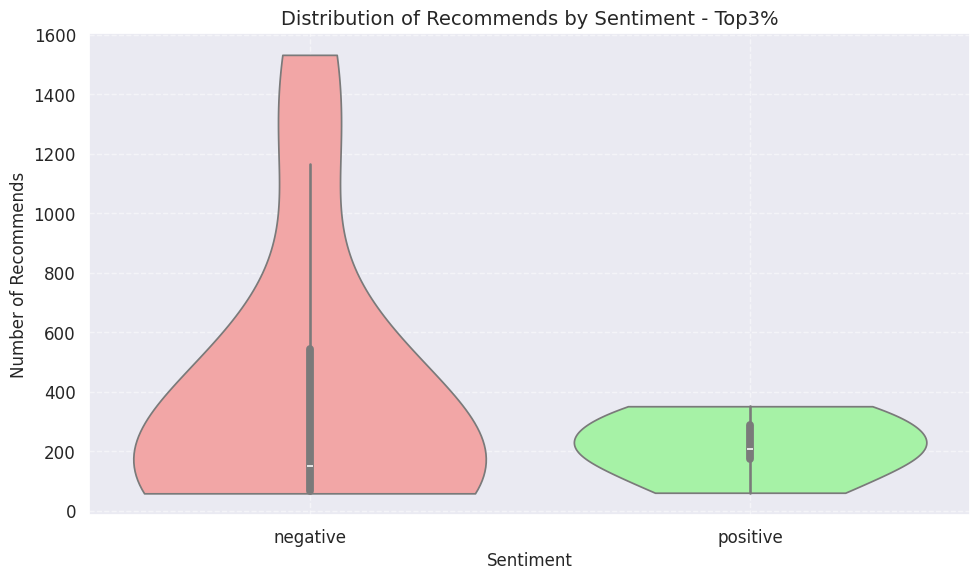

In [189]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# Pretendard Ìè∞Ìä∏ Í≤ΩÎ°ú
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

# FontProperties Îì±Î°ù Î∞è Ïù¥Î¶Ñ ÏñªÍ∏∞
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# matplotlib Ï†ÑÏ≤¥Ïóê Ï†ÅÏö©
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

# seabornÎèÑ matplotlibÏùò ÏÑ§Ï†ïÏùÑ Í∑∏ÎåÄÎ°ú Îî∞ÎùºÍ∞ê (Ïù¥ ÏãúÏ†êÏóê Ïã§ÌñâÎêòÎ©¥)
sns.set_theme(font=font_name, font_scale=1.1)

# ---- ÏãúÍ∞ÅÌôî ÏΩîÎìú ----

# Í∞êÏ†ï Î†àÏù¥Î∏î Îß§Ìïë
label_map = {0: "negative", 1: "positive"}
top_comments['sentiment'] = top_comments['label'].map(label_map)

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=top_comments,
    x='sentiment',
    y='recommends',
    palette={'negative': '#FF9999', 'positive': '#99FF99'},
    inner='box',
    cut=0
)
plt.title("Distribution of Recommends by Sentiment - Top3%", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Recommends", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

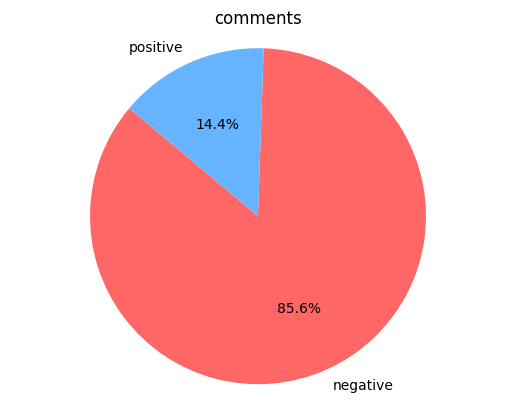

In [179]:
import matplotlib.pyplot as plt

labels = ['negative', 'positive']
sizes = [
    len(comments_df[comments_df['label'] == 0]),
    len(comments_df[comments_df['label'] == 1])
]

colors = ['#ff6666', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("comments")
plt.show()